In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col = ['Class Name', 'Left Weight', 'Left Distance', 'Right Weight', 'Right Distance']
data = pd.read_csv("balance-scale.data", names=col, sep=',')

In [3]:
from sklearn.model_selection import train_test_split
x = data.drop('Class Name', axis=1)
y = data[['Class Name']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf.fit(x_train, y_train)
ydash = clf.predict(x_test)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix
cnf = confusion_matrix(y_test, ydash)
print("Confusion matrix: ")
print(cnf)
acc = accuracy_score(y_test, ydash)
print("Accuracy score: ", acc*100)

Confusion matrix: 
[[ 0  6  8]
 [ 0 50 16]
 [ 0 19 58]]
Accuracy score:  68.78980891719745


In [6]:
target = list(data['Class Name'].unique())
features_name = list(x.columns)

In [27]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_name, class_names=target, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

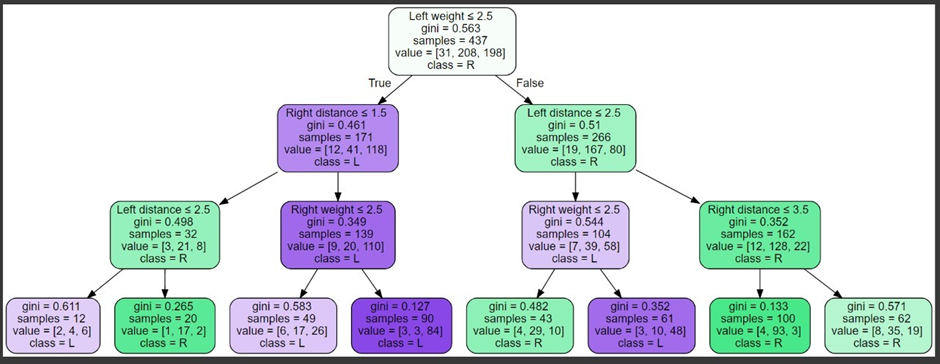